In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Confirm that there are no NaN cells by displaying NaN values per feature column.

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

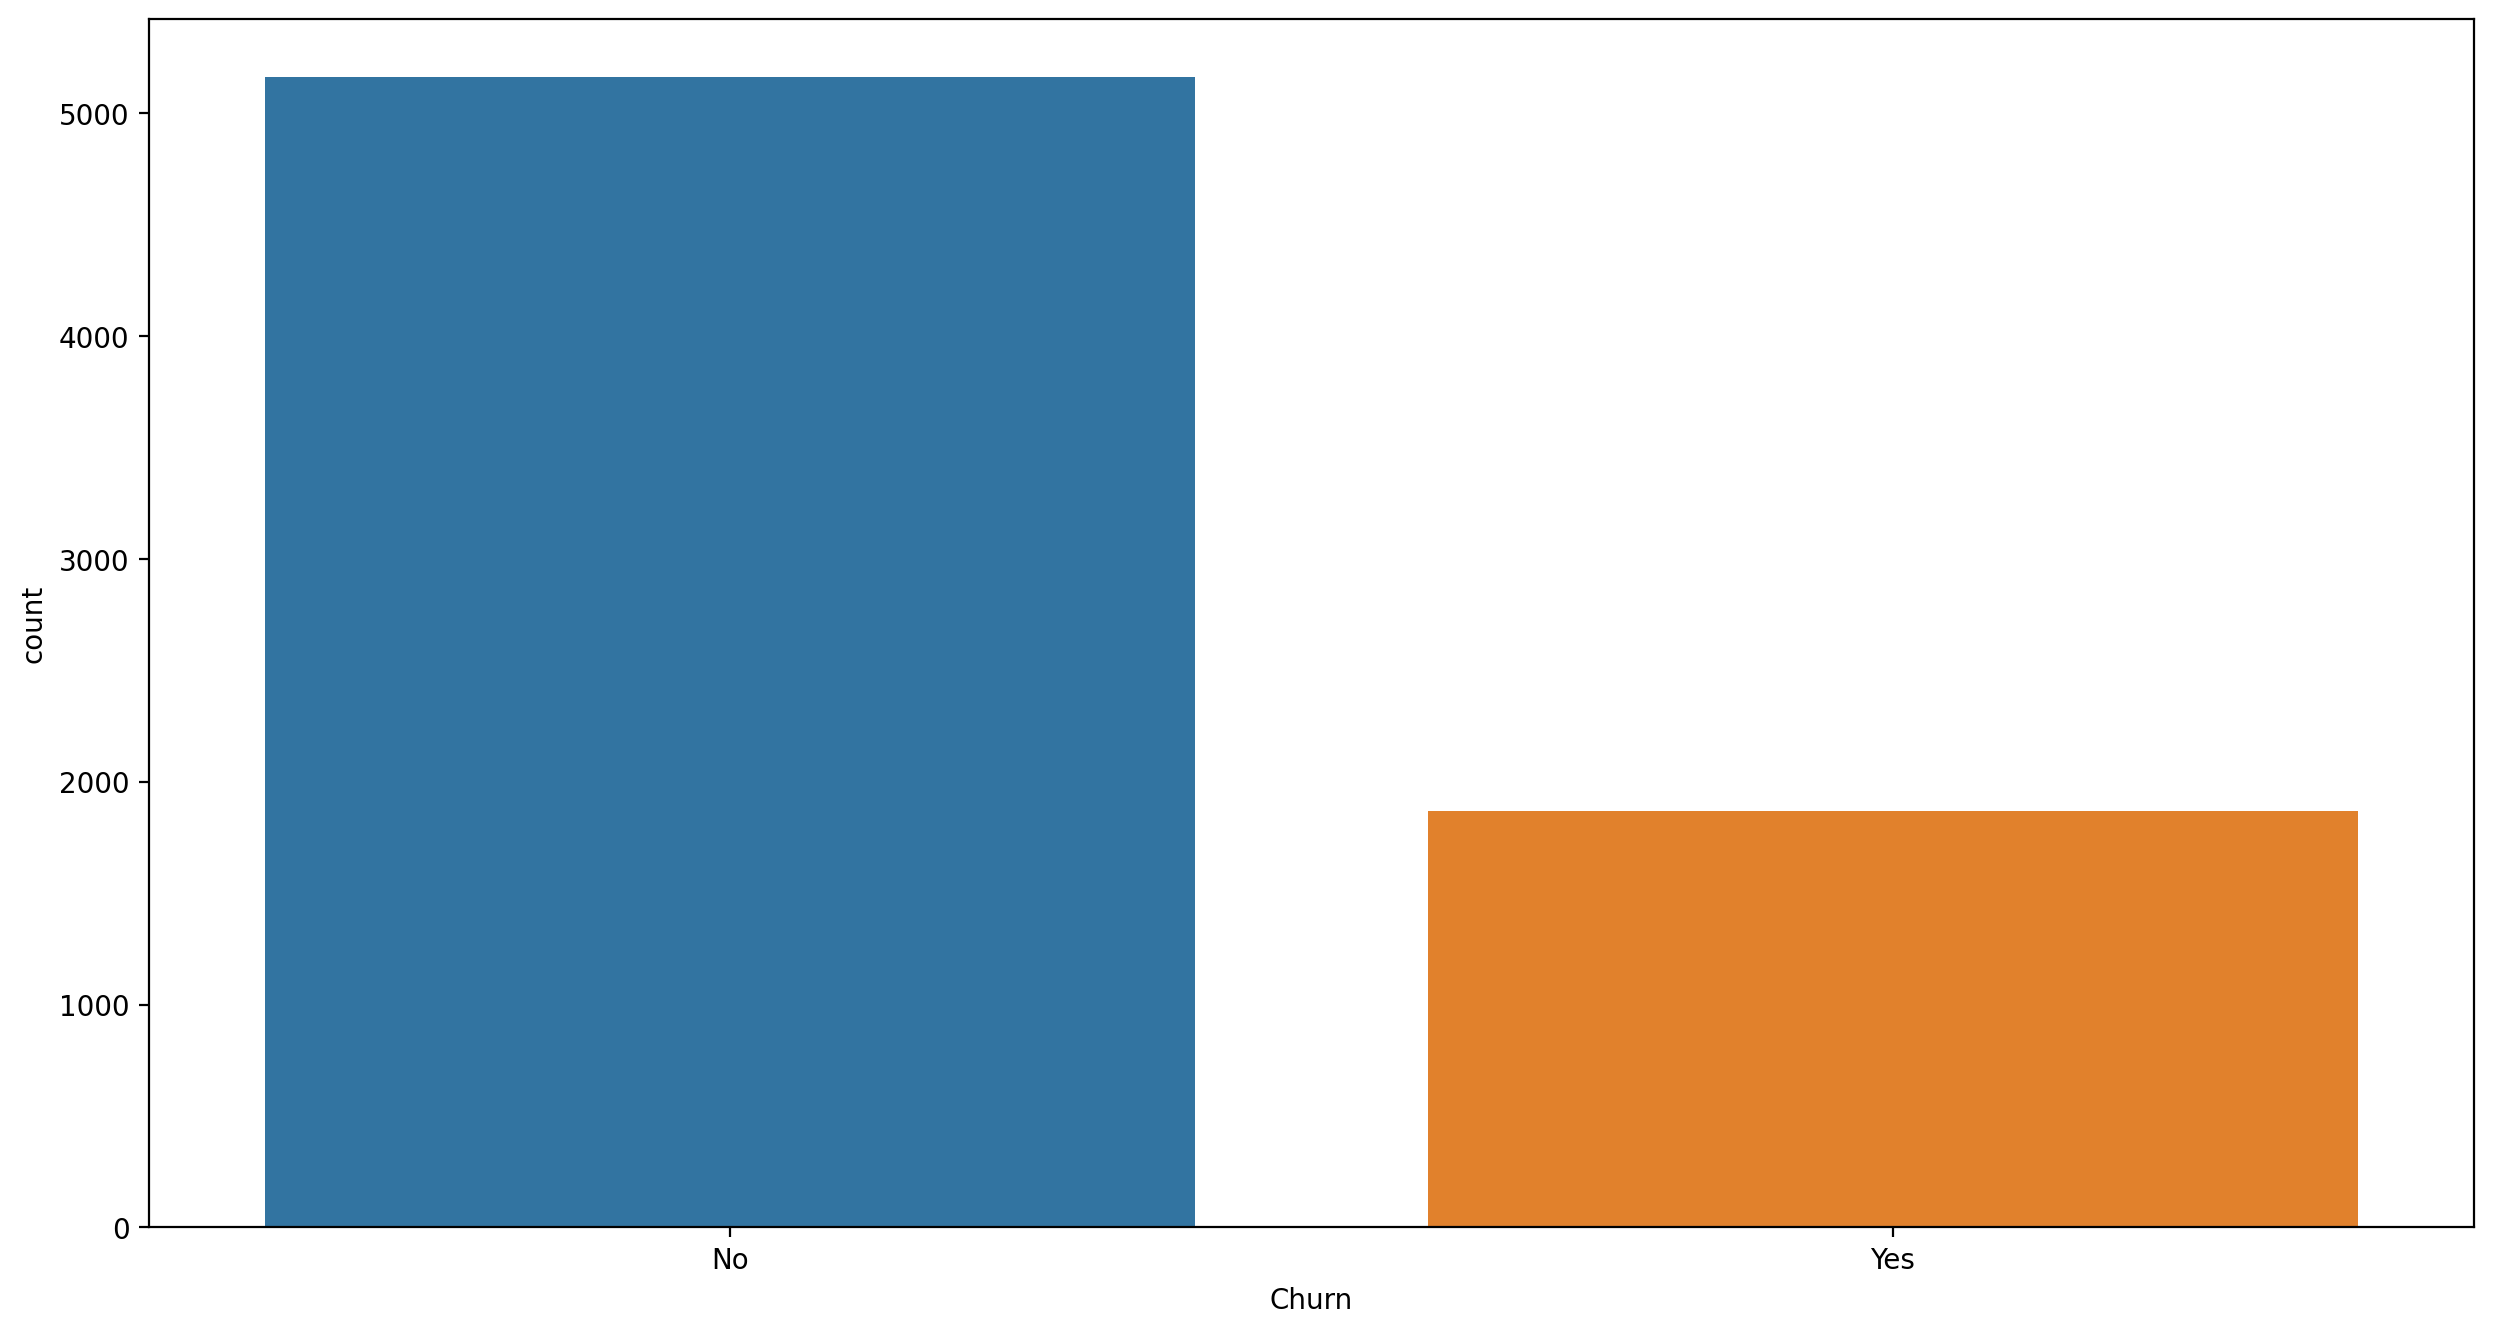

In [9]:
plt.figure(figsize =(15,8), dpi = 200)
sns.countplot(data = df, x = 'Churn')

plt.savefig('fig1.png')

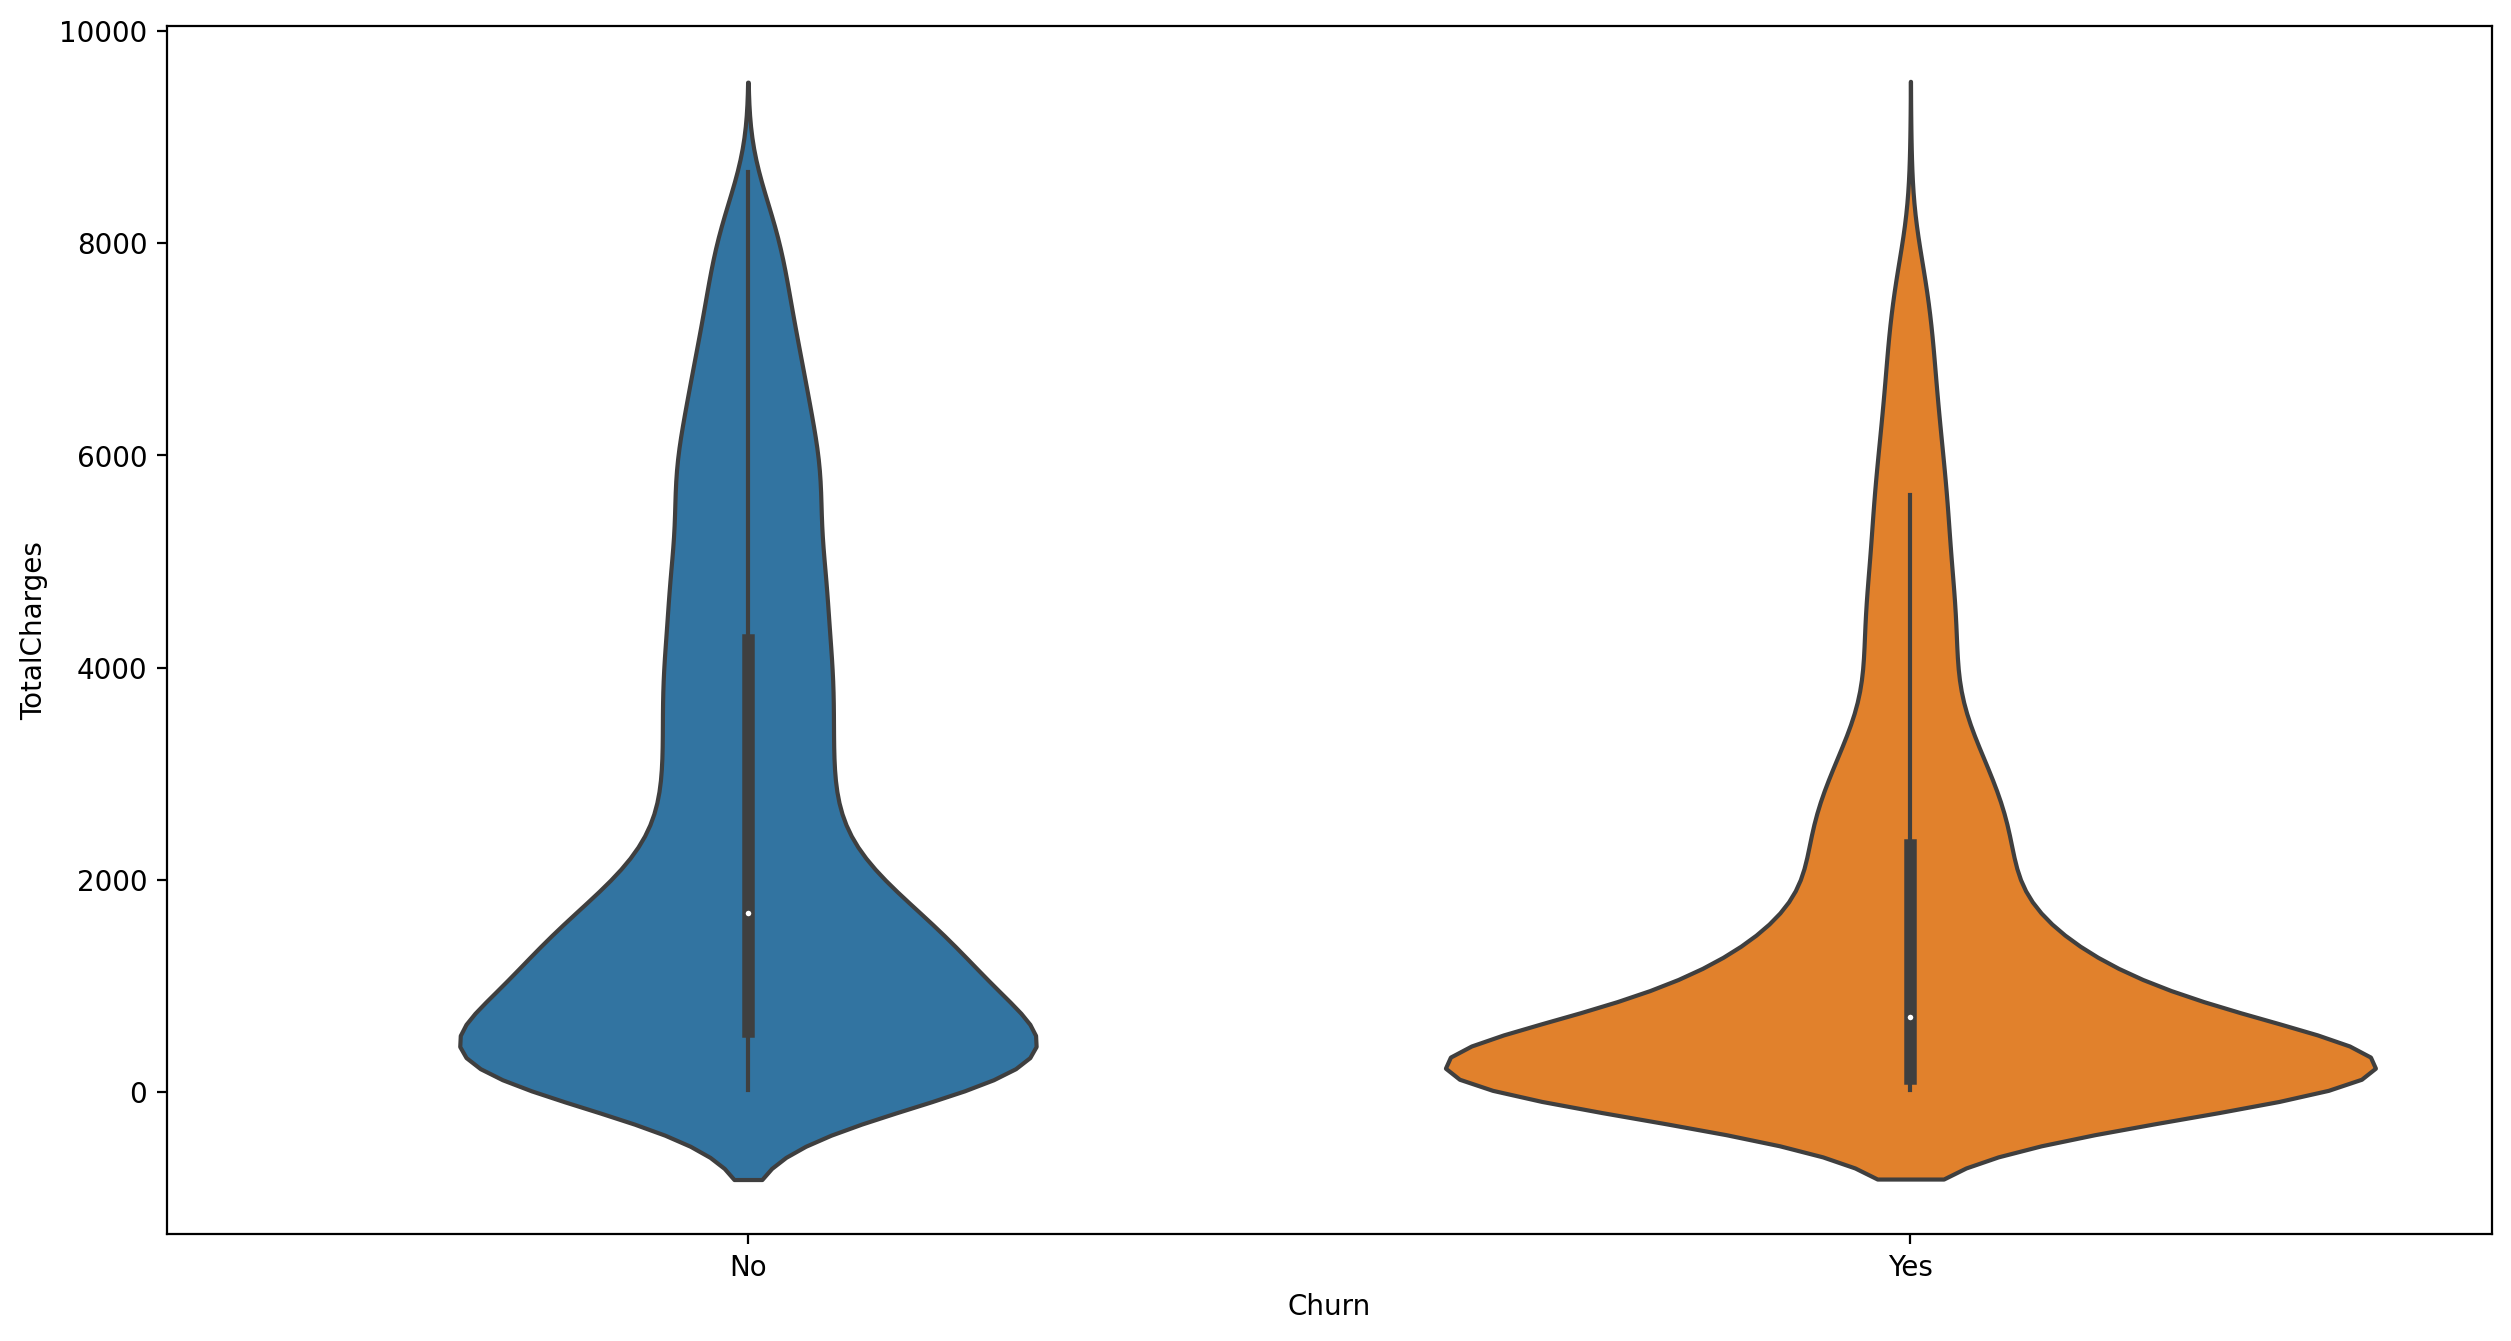

In [10]:
plt.figure(figsize =(15,8), dpi = 200)
sns.violinplot(data = df, x = 'Churn' , y = 'TotalCharges')

plt.savefig('fig2.png')

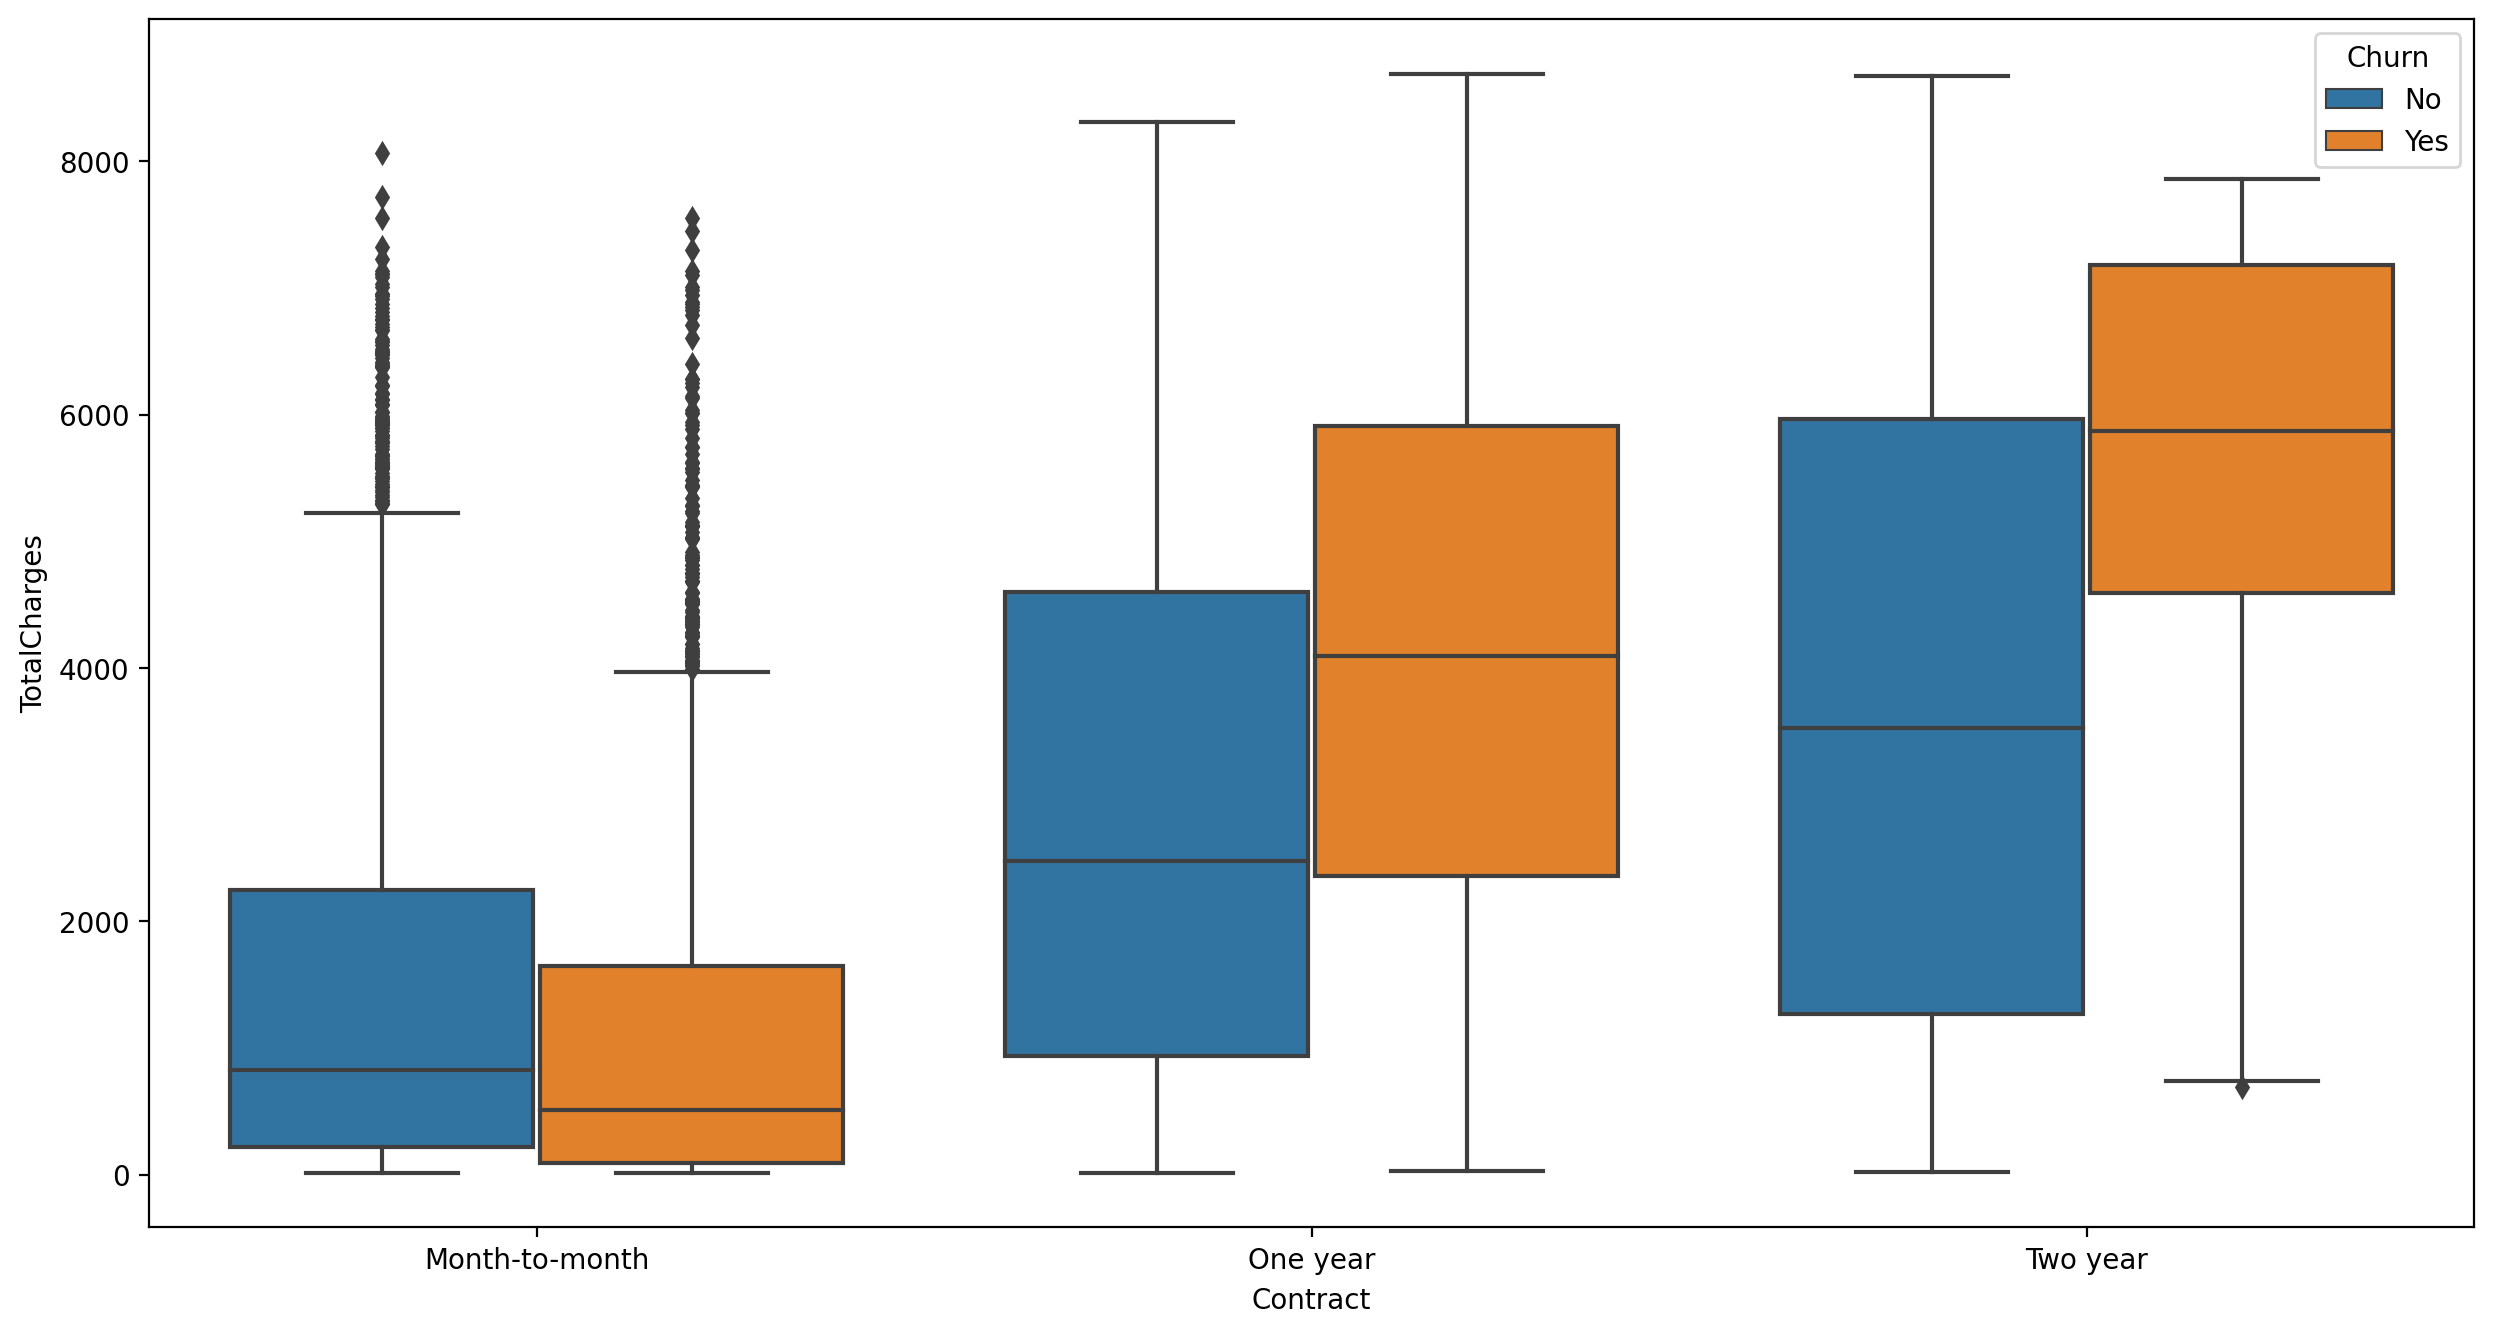

In [11]:
plt.figure(figsize =(15,8), dpi = 200)
sns.boxplot(data = df, y = 'TotalCharges', x = 'Contract', hue = 'Churn')

plt.savefig('fig3.png')

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
corr_df = pd.get_dummies(df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]).corr()

In [14]:
corr_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.005251,-0.005251,-0.005251,0.027084,0.027084,-0.005251,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.011381,-0.011381,-0.013810,-0.009437,-0.014296,-0.011381,...,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181,0.354049,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.000318,-0.001942,0.003608,0.013162,0.007572,0.001824,...,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568,-0.192858,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.008892,-0.009160,-0.010536,-0.005501,-0.010607,-0.009007,...,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708,0.199484,-0.199484
customerID_0002-ORFBO,-0.005251,-0.011381,0.000318,-0.008892,1.000000,-0.000142,-0.000142,-0.000142,-0.000142,-0.000142,...,0.023178,-0.006695,-0.009886,0.009886,-0.006320,-0.006265,-0.008490,0.021939,0.007175,-0.007175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PaymentMethod_Credit card (automatic),-0.024359,0.232800,0.030055,0.182663,-0.006265,-0.006265,-0.006265,-0.006265,-0.006265,0.022701,...,0.067590,0.174410,0.013726,-0.013726,-0.278423,1.000000,-0.373978,-0.285583,0.134687,-0.134687
PaymentMethod_Electronic check,0.171322,-0.210197,0.271117,-0.060436,-0.008490,-0.008490,0.016753,0.016753,-0.008490,-0.008490,...,-0.109546,-0.281147,-0.208427,0.208427,-0.377270,-0.373978,1.000000,-0.386971,-0.301455,0.301455
PaymentMethod_Mailed check,-0.152987,-0.232181,-0.376568,-0.294708,0.021939,0.021939,-0.006483,-0.006483,0.021939,-0.006483,...,0.000197,-0.007423,0.203981,-0.203981,-0.288097,-0.285583,-0.386971,1.000000,0.090773,-0.090773
Churn_No,-0.150541,0.354049,-0.192858,0.199484,0.007175,0.007175,-0.019822,-0.019822,-0.019822,0.007175,...,0.178225,0.301552,0.191454,-0.191454,0.118136,0.134687,-0.301455,0.090773,1.000000,-1.000000


In [15]:
corr_df['Churn_Yes'].sort_values()

Churn_No                              -1.000000
tenure                                -0.354049
Contract_Two year                     -0.301552
StreamingMovies_No internet service   -0.227578
StreamingTV_No internet service       -0.227578
                                         ...   
InternetService_Fiber optic            0.307463
TechSupport_No                         0.336877
OnlineSecurity_No                      0.342235
Contract_Month-to-month                0.404565
Churn_Yes                              1.000000
Name: Churn_Yes, Length: 7079, dtype: float64

In [16]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

tenure                                -0.354049
Contract_Two year                     -0.301552
StreamingMovies_No internet service   -0.227578
StreamingTV_No internet service       -0.227578
InternetService_No                    -0.227578
                                         ...   
PaymentMethod_Electronic check         0.301455
InternetService_Fiber optic            0.307463
TechSupport_No                         0.336877
OnlineSecurity_No                      0.342235
Contract_Month-to-month                0.404565
Name: Churn_Yes, Length: 7077, dtype: float64

## Churn Analysis 
### Now we focus on segmentating customers based on their tenure, creating 'cohorts', allowing us to examine differene between customer cohort segments

In [17]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

### Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.

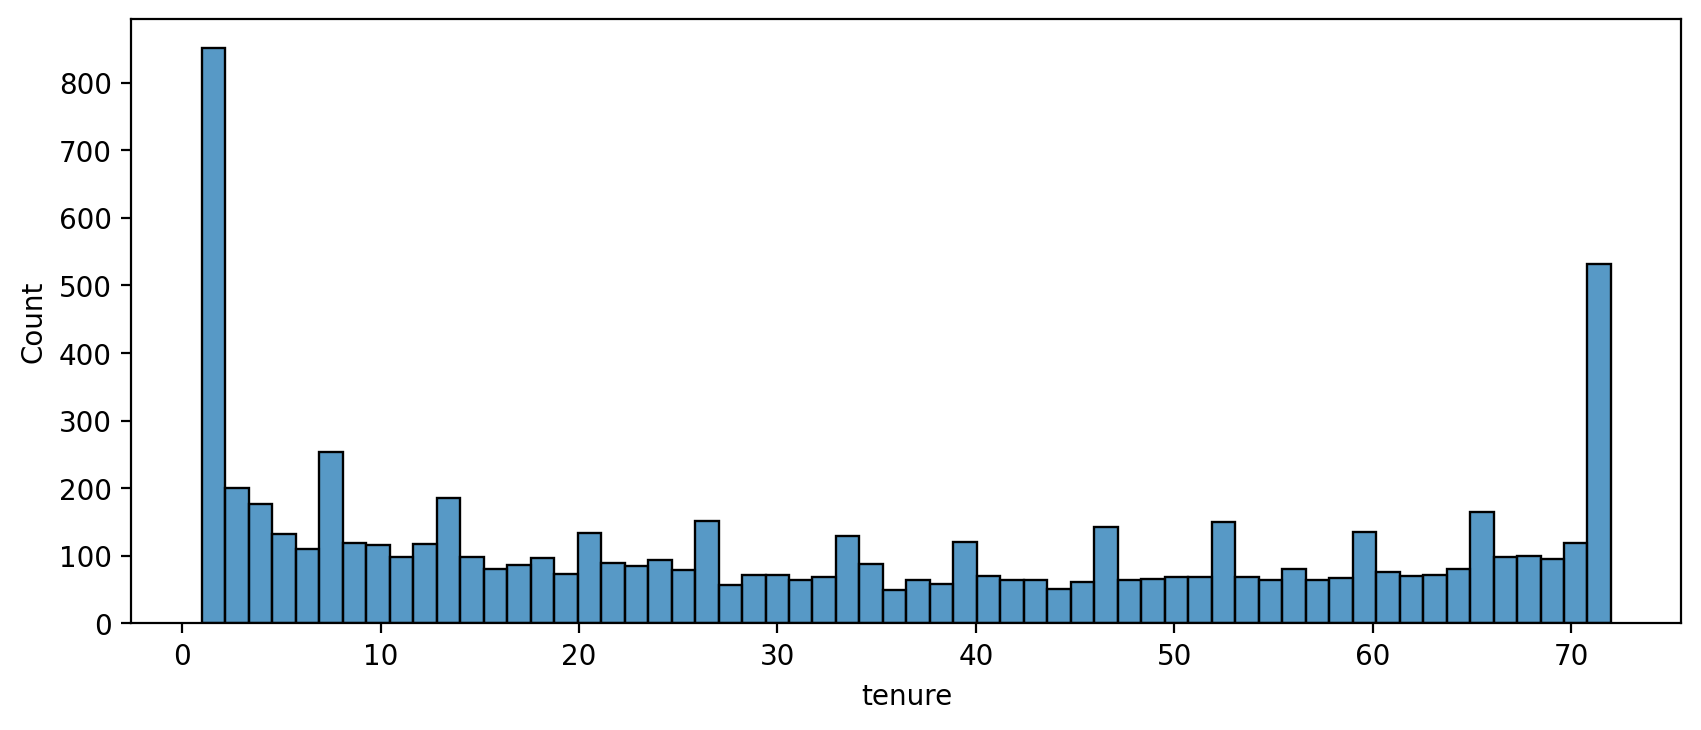

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

plt.savefig('fig4.png')

<Figure size 2000x600 with 0 Axes>

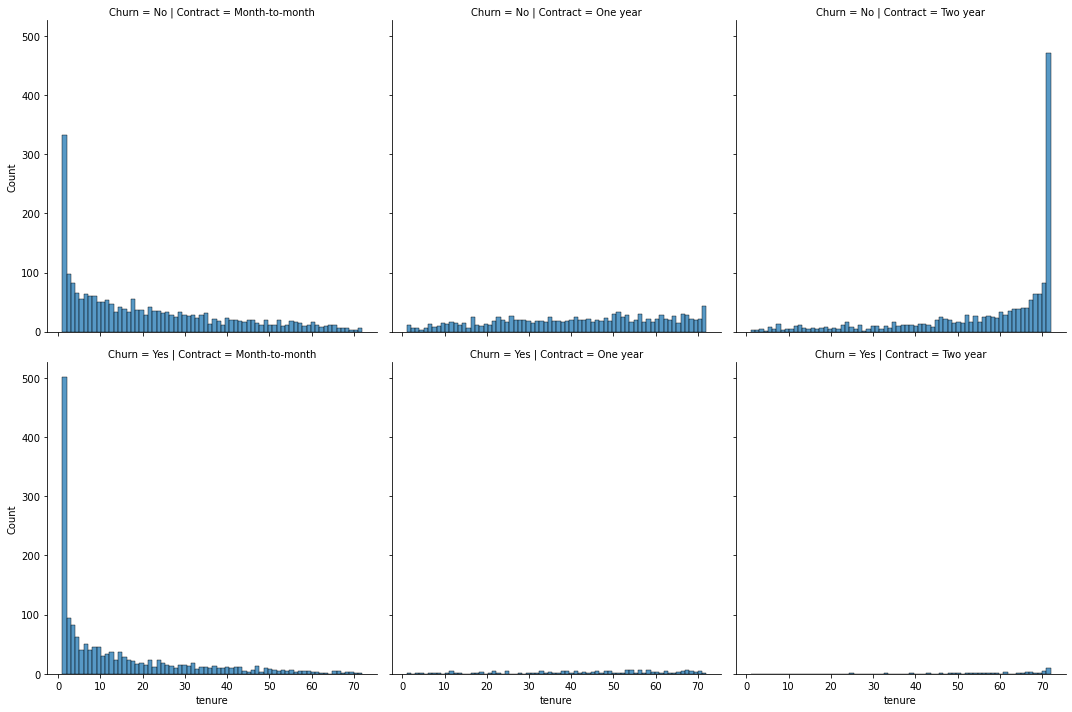

In [19]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');
plt.savefig('fig5.png')

## Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.

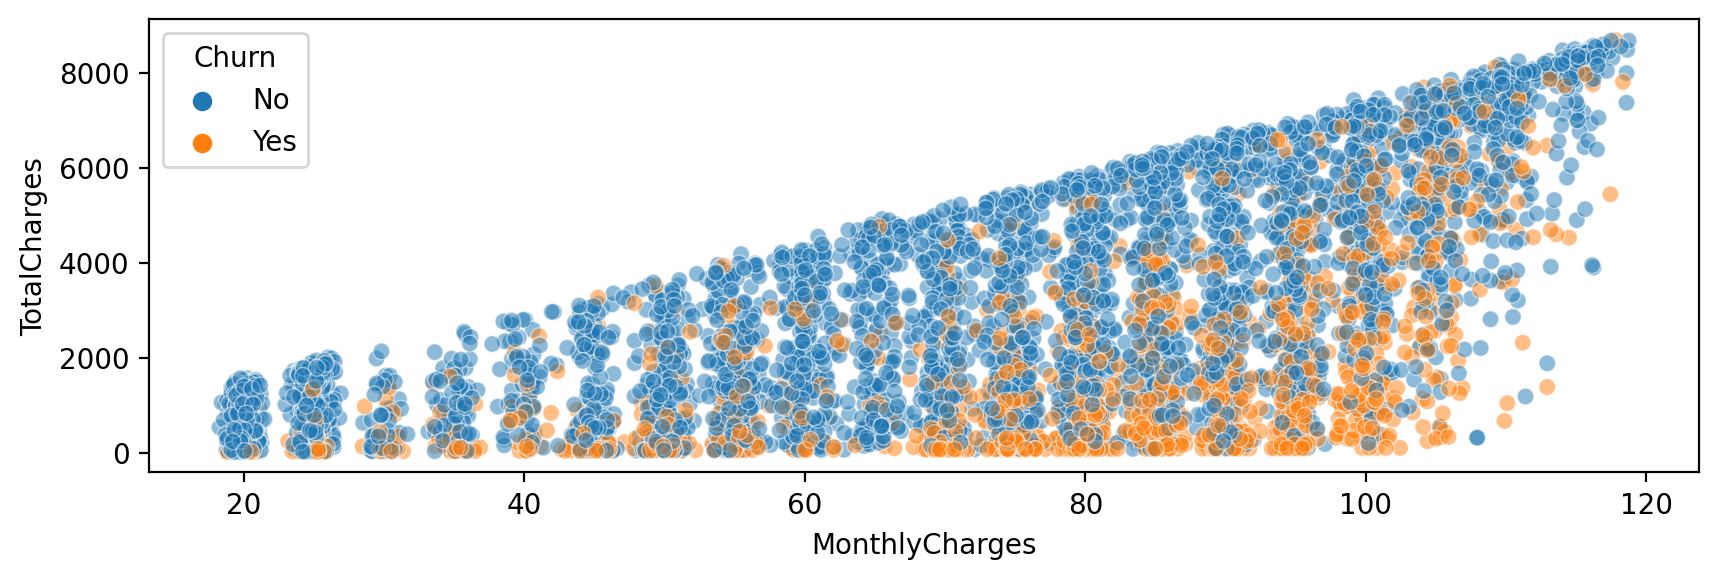

In [22]:
plt.figure(figsize=(10,3),dpi=200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', 
               linewidth=0.5,alpha=0.5)
plt.savefig('fig6.png')

## Creating Cohorts based on Tenure
### Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.

In [36]:
yes_churn =  df.groupby(['Churn' , 'tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [37]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [39]:
churn_rate.transpose()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
tenure,,,,,,,,,,,,,,,,,,,
1,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212
2,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672
3,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
4,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091
5,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
69,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053
70,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697


In [42]:
##churn_rate.transpose()['customerID'].plot()

In [43]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

## Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:

### '0-12 Months'
### '24-48 Months'
### '12-24 Months'
### 'Over 48 Months'

In [49]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"


In [51]:
cohort(17)

'12-24 Months'

In [53]:
df ['Tenure Cohort'] = df['tenure'].apply(cohort)

In [55]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


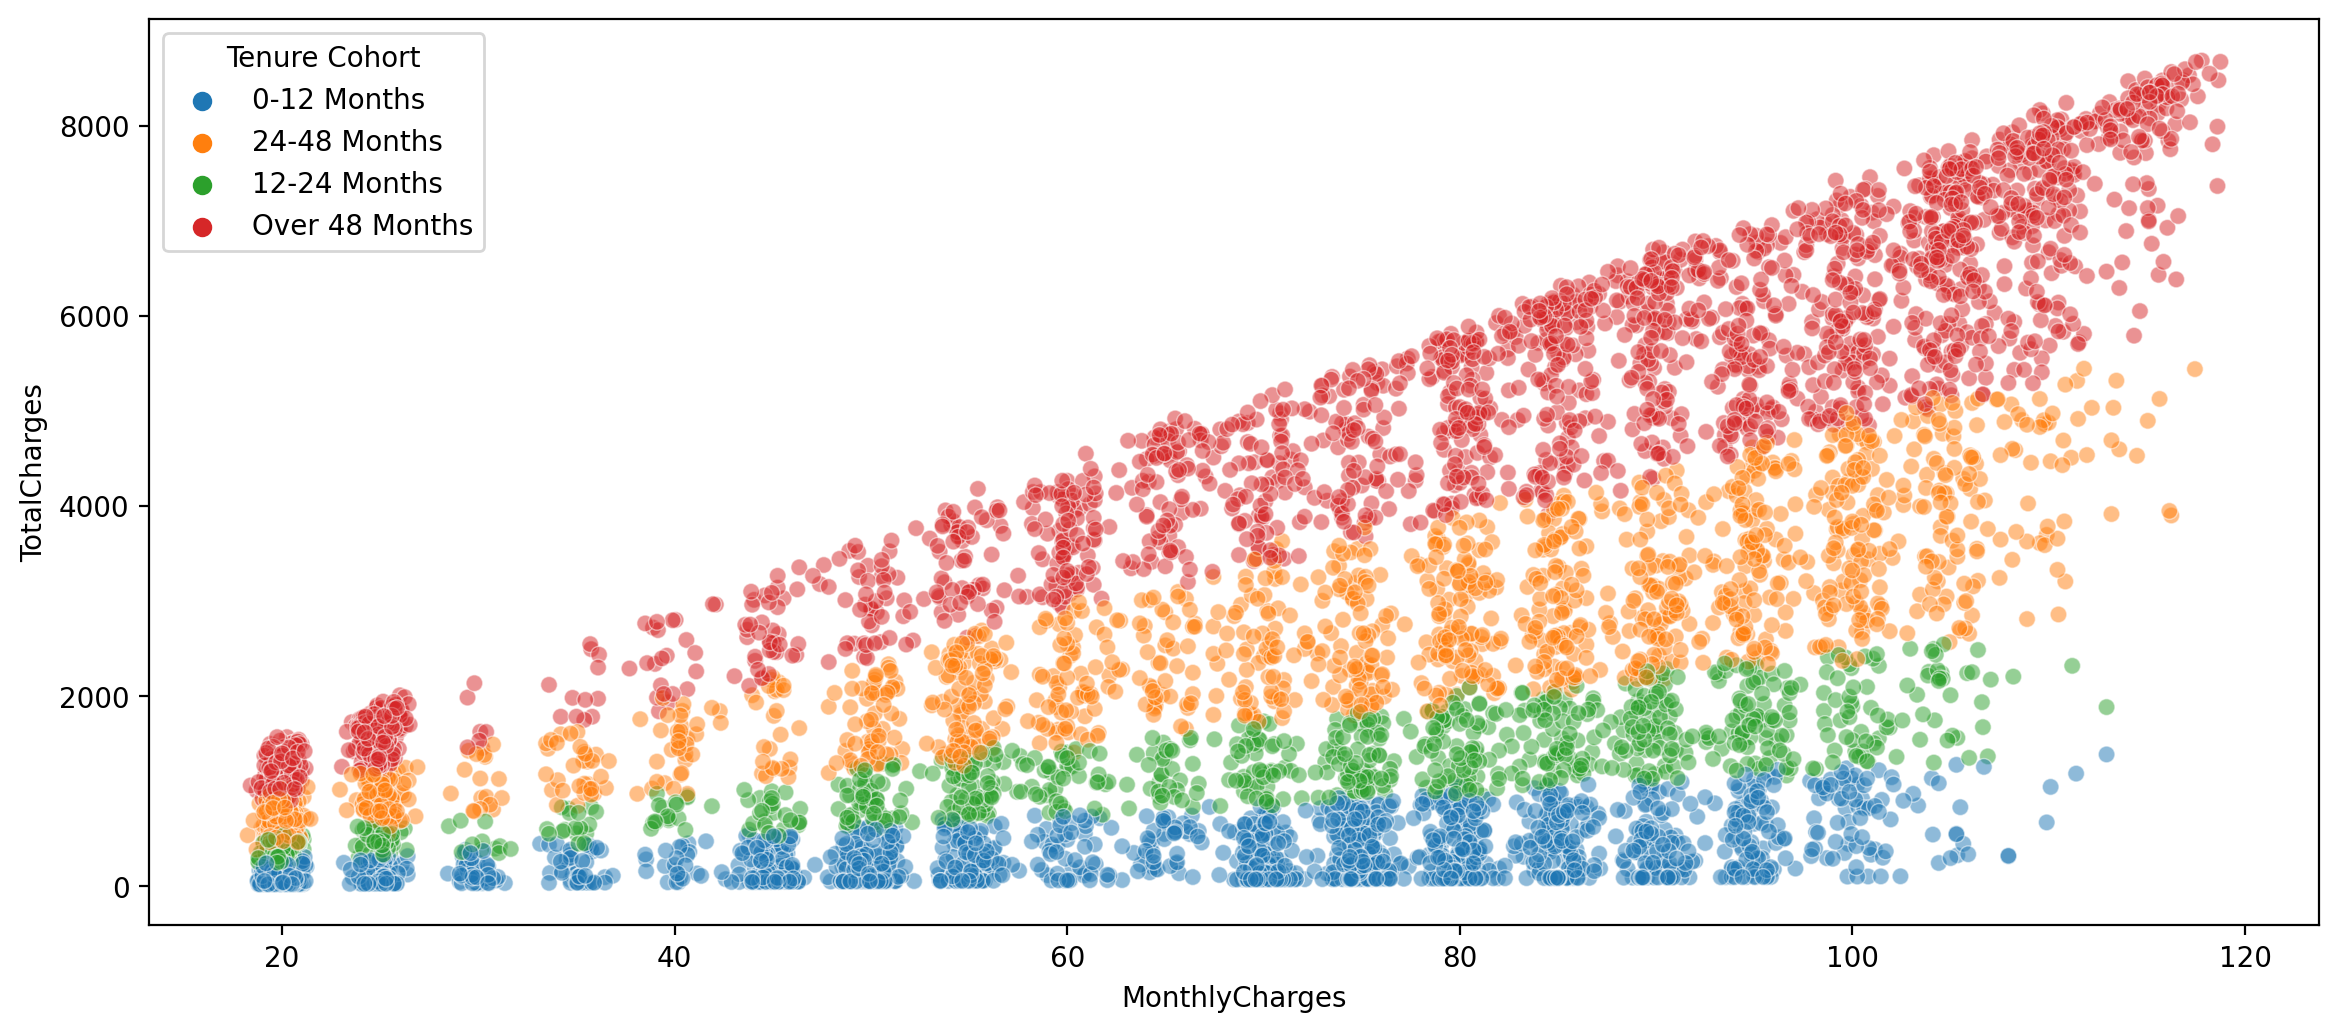

In [64]:
## Now create a scatter plot between monthly charge and total charge
plt.figure(figsize=(14,6), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Tenure Cohort', 
                linewidth = 0.5, alpha = 0.5)

plt.savefig('fig7.png')

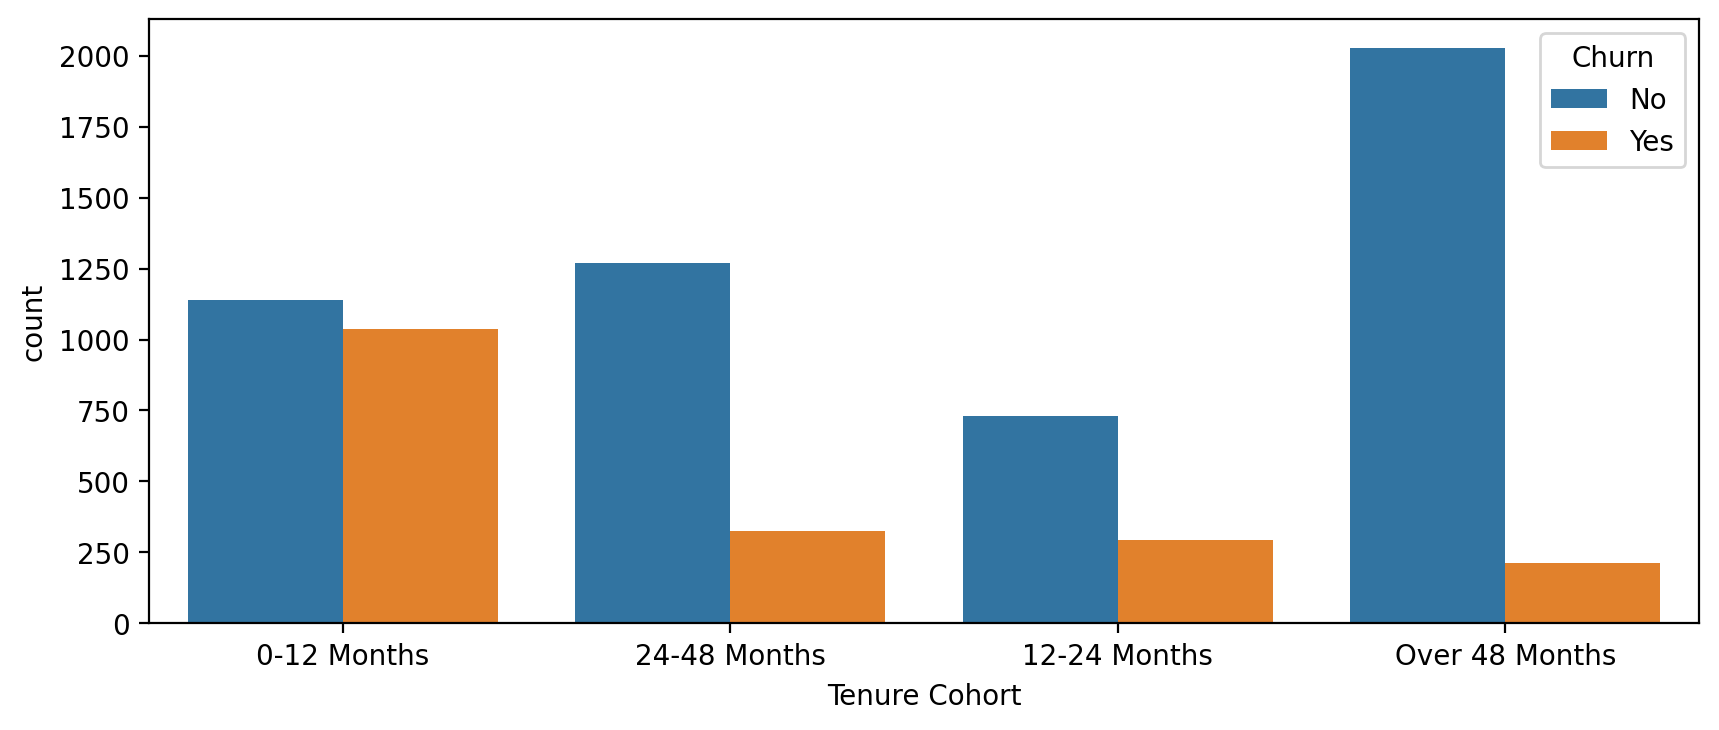

In [65]:
## Create a count plot the churm count per cohort
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

plt.savefig('fig8.png')

## Now Lets discuss our Predictive Modeling 
#### Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.

In [70]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0-12 Months
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,12-24 Months
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0-12 Months
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,24-48 Months
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,Over 48 Months


In [72]:
X = df.drop(['Churn' , 'customerID'],axis= 1)

In [73]:
X = pd.get_dummies(X,drop_first=True)

In [74]:
y = df['Churn']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.1, random_state = 101)

In [77]:
## Decision Tree Perfomance
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier(max_depth = 8)

In [79]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [80]:
pred = dt.predict(X_test)

In [82]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.87      0.87      0.87       557
         Yes       0.51      0.50      0.51       147

    accuracy                           0.80       704
   macro avg       0.69      0.69      0.69       704
weighted avg       0.79      0.80      0.79       704



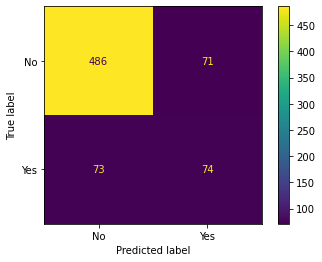

In [85]:
plot_confusion_matrix(dt,X_test,y_test)

In [86]:
from sklearn.tree import plot_tree

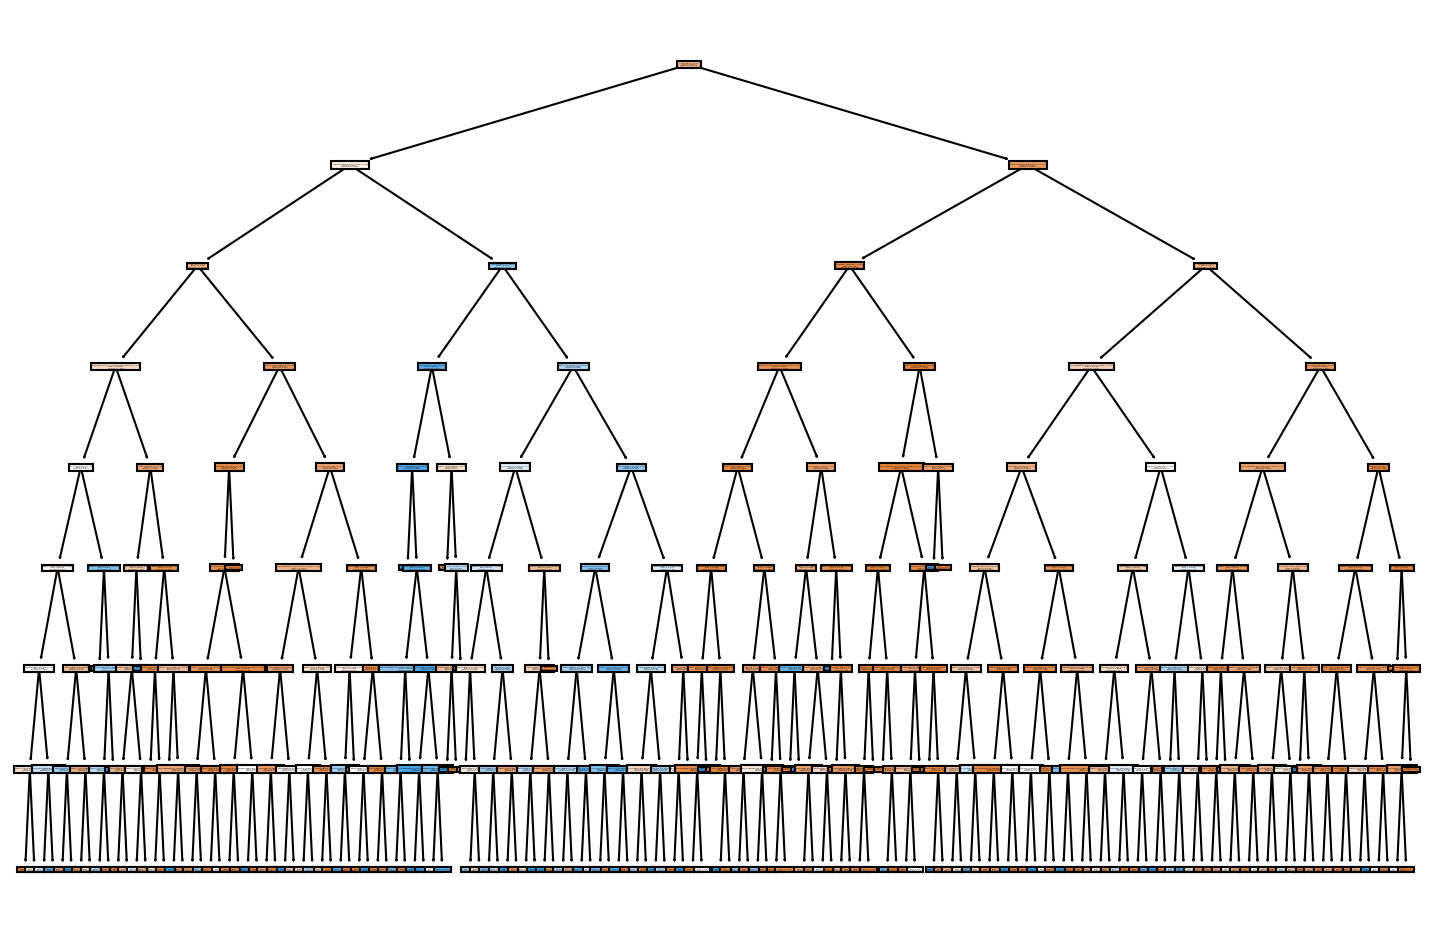

In [88]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns)

plt.savefig('fig9.png')

## Random Forest

### Now determine aRandom Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf = RandomForestClassifier(n_estimators= 100, max_depth=8)

In [96]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

In [97]:
predts = rf.predict(X_test)

In [98]:
print(classification_report(y_test,predts))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.47      0.53       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



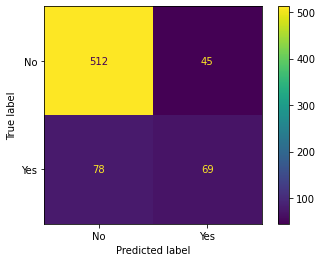

In [112]:
plot_confusion_matrix(rf,X_test,y_test)

## Boosted Trees
### We are trying Ada Boost and gredient Boost to create a model and report back the classification report and plot a confusion matrix for its predicted results

In [114]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [115]:
ada_model = AdaBoostClassifier()

In [116]:
gb_model = GradientBoostingClassifier()

In [117]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [118]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [119]:
ada_preds = ada_model.predict(X_test)

In [120]:
gb_preds = gb_model.predict(X_test)

In [121]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [122]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



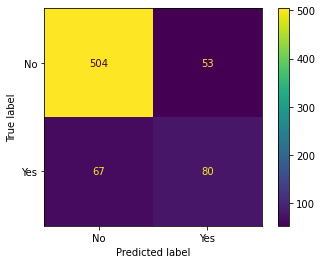

In [123]:
plot_confusion_matrix(ada_model,X_test,y_test)

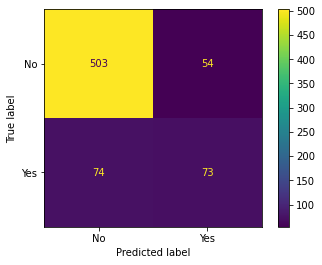

In [124]:
plot_confusion_matrix(gb_model,X_test,y_test)

#### # With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

# Great Job!!